--------------------------------------------------------------------------------------------------------------------

## Traditional Models for phishing email detection

--------------------------------------------------------------------------------------------------------------------

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
import re
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
# Text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [53]:
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...


In [3]:
# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [4]:
# Models
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Evaluation metrics
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                           roc_auc_score, roc_curve, precision_recall_curve, f1_score)

--------------------------------------------------------------------------------------------------------------------

#### Loading data

In [5]:
df1 = pd.read_csv("C:/Users/LOQ/Desktop/SpamAssasin.csv")
df2 = pd.read_csv("C:/Users/LOQ/Desktop/CEAS_08.csv")

--------------------------------------------------------------------------------------------------------------------

#### Inspection

In [6]:
df1

,sender,receiver,date,subject,body,label,urls
0,Robert Elz <kre@munnari.OZ.AU>,Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,"Thu, 22 Aug 2002 18:26:25 +0700",Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500 ...",0,1
1,Steve Burt <Steve_Burt@cursor-system.com>,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...","Thu, 22 Aug 2002 12:46:18 +0100",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Gre...",0,1
2,"""Tim Chapman"" <timc@2ubh.com>",zzzzteana <zzzzteana@yahoogroups.com>,"Thu, 22 Aug 2002 13:52:38 +0100",[zzzzteana] Moscow bomber,Man Threatens Explosion In Moscow \n\nThursday...,0,1
3,Monty Solomon <monty@roscom.com>,undisclosed-recipient: ;,"Thu, 22 Aug 2002 09:15:25 -0400",[IRR] Klez: The Virus That Won't Die,Klez: The Virus That Won't Die\n \nAlready the...,0,1
4,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,zzzzteana@yahoogroups.com,"Thu, 22 Aug 2002 14:38:22 +0100",Re: [zzzzteana] Nothing like mama used to make,"> in adding cream to spaghetti carbonara, whi...",0,1
...,...,...,...,...,...,...,...
5804,Professional_Career_Development_Institute@Frug...,yyyy@netnoteinc.com,"Tue, 3 Dec 2002 13:19:58 -0800",Busy? Home Study Makes Sense!,\n\n \n--- \n![](http://images.pcdi-homestud...,1,1
5805,"""IQ - TBA"" <tba@insiq.us>",<yyyy@spamassassin.taint.org>,"Tue, 3 Dec 2002 18:52:29 -0500",Preferred Non-Smoker Rates for Smokers,This is a multi-part message in MIME format. -...,1,1
5806,Mike <raye@yahoo.lv>,Mailing.List@user2.pro-ns.net,"Sun, 20 Jul 2003 16:19:44 +0800","How to get 10,000 FREE hits per day to any web...","Dear Subscriber,\n\nIf I could show you a way ...",1,1
5807,"""Mr. Clean"" <cweqx@dialix.oz.au>",<Undisclosed.Recipients@webnote.net>,"Wed, 05 Aug 2020 04:01:50 -1900",Cannabis Difference,****Mid-Summer Customer Appreciation SALE!****...,1,0


In [7]:
df1['label'].nunique()

2

In [8]:
df2

,sender,receiver,date,subject,body,label,urls
0,Young Esposito <Young@iworld.de>,user4@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 16:31:02 -0700",Never agree to be a loser,"Buck up, your troubles caused by small dimensi...",1,1
1,Mok <ipline's1983@icable.ph>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 18:31:03 -0500",Befriend Jenna Jameson,\nUpgrade your sex and pleasures with these te...,1,1
2,Daily Top 10 <Karmandeep-opengevl@universalnet...,user2.9@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 20:28:00 -1200",CNN.com Daily Top 10,>+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...,1,1
3,Michael Parker <ivqrnai@pobox.com>,SpamAssassin Dev <xrh@spamassassin.apache.org>,"Tue, 05 Aug 2008 17:31:20 -0600",Re: svn commit: r619753 - in /spamassassin/tru...,Would anyone object to removing .so from this ...,0,1
4,Gretchen Suggs <externalsep1@loanofficertool.com>,user2.2@gvc.ceas-challenge.cc,"Tue, 05 Aug 2008 19:31:21 -0400",SpecialPricesPharmMoreinfo,\nWelcomeFastShippingCustomerSupport\nhttp://7...,1,1
...,...,...,...,...,...,...,...
39149,CNN Alerts <charlene-detecton@btcmarketing.com>,email1007@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:34:50 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39150,CNN Alerts <idgetily1971@careplusnj.org>,email104@gvc.ceas-challenge.cc,"Fri, 08 Aug 2008 10:35:11 -0400",CNN Alerts: My Custom Alert,\n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n ...,1,0
39151,Abhijit Vyas <xpojhbz@gmail.com>,fxgmqwjn@triptracker.net,"Fri, 08 Aug 2008 22:00:43 +0800",Slideshow viewer,Hello there ! \nGreat work on the slide show v...,0,0
39152,Joseph Brennan <vupzesm@columbia.edu>,zqoqi@spamassassin.apache.org,"Fri, 08 Aug 2008 09:00:46 -0500",Note on 2-digit years,"\nMail from sender , coming from intuit.com\ns...",0,0


In [9]:
df2['label'].nunique()

2

--------------------------------------------------------------------------------------------------------------------

#### Joining Data

In [10]:
df = pd.concat([df1, df2], ignore_index=True)

In [11]:
df['label'].nunique()

2

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44963 entries, 0 to 44962
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    44963 non-null  object
 1   receiver  44291 non-null  object
 2   date      44963 non-null  object
 3   subject   44919 non-null  object
 4   body      44962 non-null  object
 5   label     44963 non-null  int64 
 6   urls      44963 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


--------------------------------------------------------------------------------------------------------------------

#### Data Cleaning

In [13]:
duplicate_rows = df.duplicated()
duplicate_count = duplicate_rows.sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [14]:
df.isnull().sum()

sender        0
receiver    672
date          0
subject      44
body          1
label         0
urls          0
dtype: int64

In [15]:
df.dropna(subset=['receiver', 'subject', 'body', 'label'], inplace=True)

In [16]:
df['text'] = df['subject'].fillna('') + ' ' + df['body'].fillna('')
df['label'] = df['label'].apply(lambda x: 1 if x == 1 else 0)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44251 entries, 0 to 44962
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    44251 non-null  object
 1   receiver  44251 non-null  object
 2   date      44251 non-null  object
 3   subject   44251 non-null  object
 4   body      44251 non-null  object
 5   label     44251 non-null  int64 
 6   urls      44251 non-null  int64 
 7   text      44251 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


In [18]:
df.describe()

,label,urls
count,44251.000000,44251.000000
mean,0.530722,0.698425
std,0.499061,0.458947
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [19]:
print(f"Final dataset shape: {df.shape}")

Final dataset shape: (44251, 8)


--------------------------------------------------------------------------------------------------------------------

#### Exploratory Data Analysis

In [20]:
# Label distribution
label_counts = df['label'].value_counts()
print(f"Label distribution:\nLegitimate (0): {label_counts[0]}\nPhishing/Spam (1): {label_counts[1]}")
print(f"Phishing ratio: {label_counts[1] / len(df):.2%}")

Label distribution:
Legitimate (0): 20766
Phishing/Spam (1): 23485
Phishing ratio: 53.07%


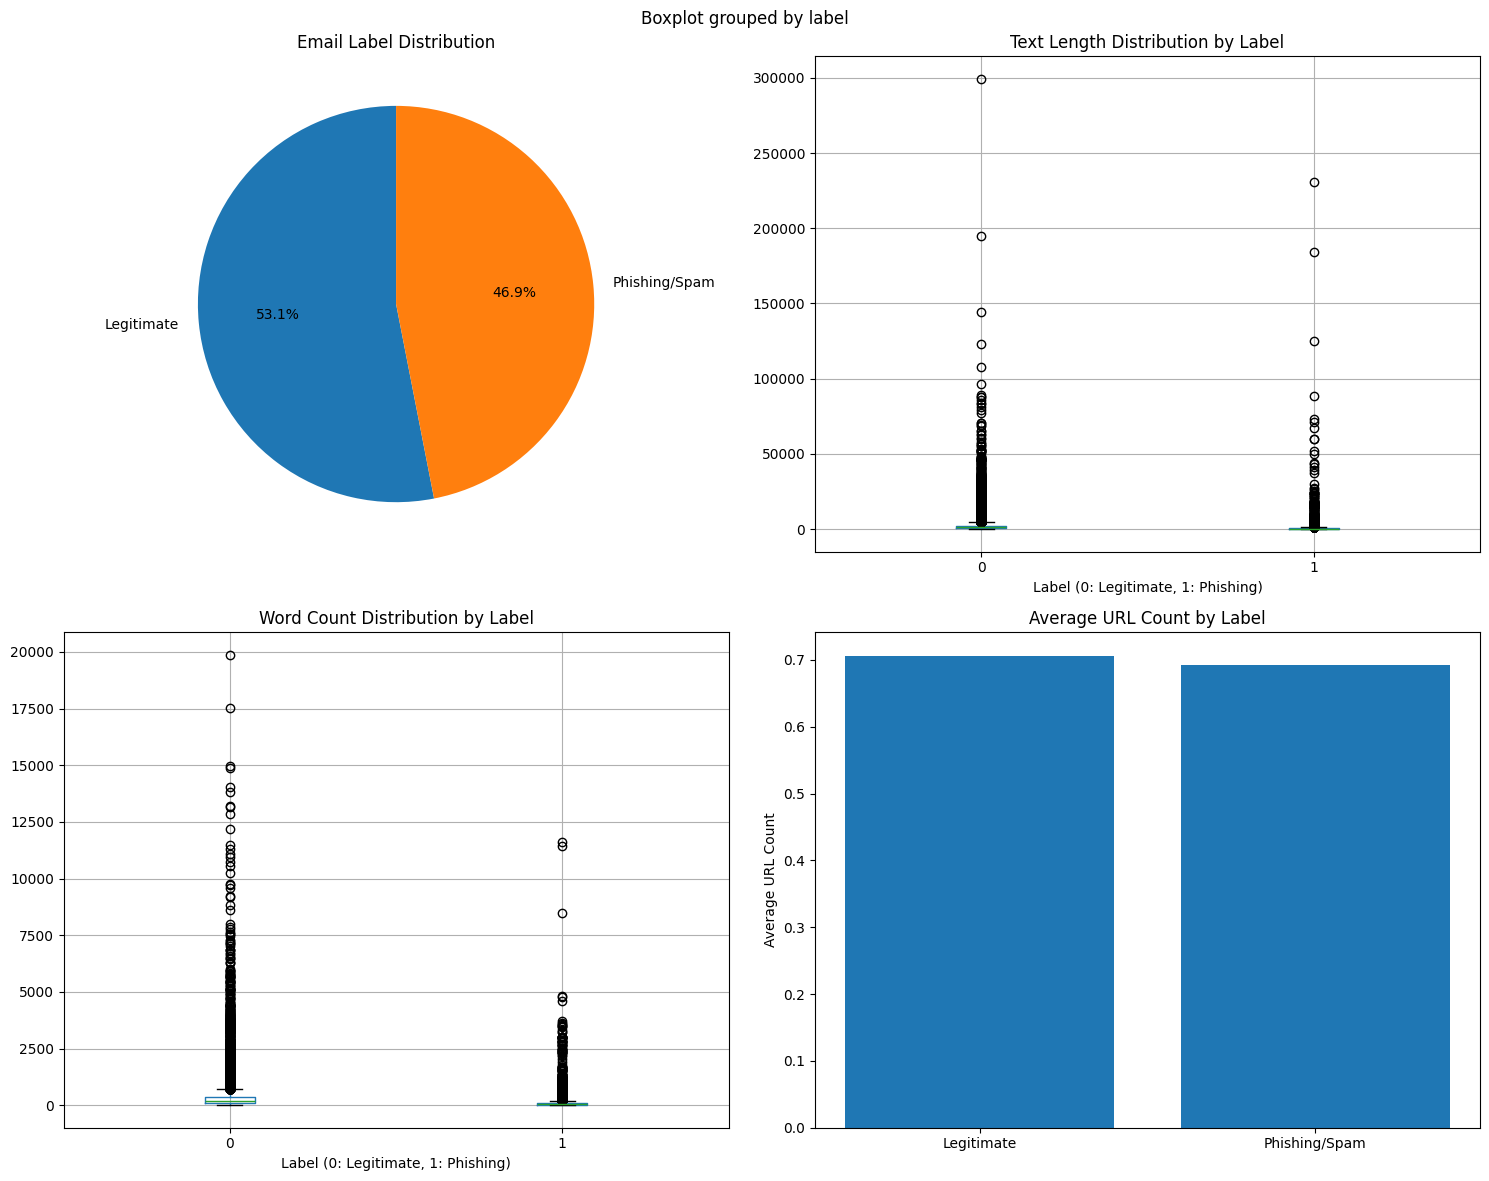

In [21]:
# visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Label distribution
axes[0, 0].pie(label_counts.values, labels=['Legitimate', 'Phishing/Spam'], 
               autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Email Label Distribution')

# 2. Text length distribution
df['text_length'] = df['text'].str.len()
df.boxplot(column='text_length', by='label', ax=axes[0, 1])
axes[0, 1].set_title('Text Length Distribution by Label')
axes[0, 1].set_xlabel('Label (0: Legitimate, 1: Phishing)')

# 3. Word count distribution
df['word_count'] = df['text'].str.split().str.len()
df.boxplot(column='word_count', by='label', ax=axes[1, 0])
axes[1, 0].set_title('Word Count Distribution by Label')
axes[1, 0].set_xlabel('Label (0: Legitimate, 1: Phishing)')

# 4. URL presence?
url_by_label = df.groupby('label')['urls'].mean()
axes[1, 1].bar(['Legitimate', 'Phishing/Spam'], url_by_label.values)
axes[1, 1].set_title('Average URL Count by Label')
axes[1, 1].set_ylabel('Average URL Count')

plt.tight_layout()
plt.show()

In [38]:
# Statistical summary
print(df.groupby('label')[['text_length']].describe())


Statistical Summary:
      text_length                                                         \
            count         mean          std   min    25%     50%     75%   
label                                                                      
0         20766.0  2518.178561  5553.915880  26.0  726.0  1249.0  2389.0   
1         23485.0  1010.535917  2965.703942  22.0  198.0   334.0   631.0   

                 
            max  
label            
0      299272.0  
1      230917.0  


In [39]:
print(df.groupby('label')[['word_count']].describe())

      word_count                                                           
           count        mean         std  min    25%    50%    75%      max
label                                                                      
0        20766.0  347.502649  683.683648  2.0  104.0  186.0  349.0  19873.0
1        23485.0  108.510666  223.692738  3.0   27.0   52.0  100.0  11627.0


In [1]:
print(df.groupby('label')[['urls']].describe())

NameError: name 'df' is not defined

--------------------------------------------------------------------------------------------------------------------

In [22]:
def clean_text(text):
    text = text.lower()
    # for URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # remove email-addresses
    text = re.sub(r'\S+@\S+', '', text)
    # HTML tags
    text = re.sub(r'<.*?>', '', text)
    # special characters & digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # extra whitespaces
    text = ' '.join(text.split())
    
    return text

In [23]:
def advanced_text_preprocessing(text):
    text = clean_text(text)
    tokens = word_tokenize(text)

    # stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

In [43]:
df['text'][0]

'Re: New Sequences Window Date:        Wed, 21 Aug 2002 10:54:46 -0500     From:        Chris Garrigues      Message-ID:  <1029945287.4797.TMDA@deepeddy.vircio.com>   | I can\'t reproduce this error. For me it is very repeatable... (like every time, without fail). This is the debug log of the pick happening ... 18:19:03 Pick_It {exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace} {4852-4852 -sequence mercury} 18:19:03 exec pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace 4852-4852 -sequence mercury 18:19:04 Ftoc_PickMsgs {{1 hit}} 18:19:04 Marking 1 hits 18:19:04 tkerror: syntax error in expression "int ... Note, if I run the pick command by hand ... delta$ pick +inbox -list -lbrace -lbrace -subject ftp -rbrace -rbrace  4852-4852 -sequence mercury 1 hit That\'s where the "1 hit" comes from (obviously).  The version of nmh I\'m using is ... delta$ pick -version pick -- nmh-1.0.4 [compiled on fuchsia.cs.mu.OZ.AU at Sun Mar 17 14:55:56 ICT 2002] And the rele

In [24]:
# Apply text preprocessing
df['cleaned_text'] = df['text'].apply(clean_text)

In [51]:
df['cleaned_text'][0]

're new sequences window date wed aug from chris garrigues messageid i cant reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening pickit exec pick inbox list lbrace lbrace subject ftp rbrace rbrace sequence mercury exec pick inbox list lbrace lbrace subject ftp rbrace rbrace sequence mercury ftocpickmsgs hit marking hits tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace sequence mercury hit thats where the hit comes from obviously the version of nmh im using is delta pick version pick nmh compiled on fuchsiacsmuozau at sun mar ict and the relevant part of my mhprofile delta mhparam pick seq sel list since the pick command works the sequence actually both of them the one thats explicit on the command line from the search popup and the one that comes from mhprofile do get created kre ps this is still using the version of the code f

In [25]:
df['processed_text'] = df['text'].apply(advanced_text_preprocessing)

In [56]:
df['processed_text'][0]

'new sequence window date wed aug chris garrigues messageid cant reproduce error repeatable like every time without fail debug log pick happening pickit exec pick inbox list lbrace lbrace subject ftp rbrace rbrace sequence mercury exec pick inbox list lbrace lbrace subject ftp rbrace rbrace sequence mercury ftocpickmsgs hit marking hit tkerror syntax error expression int note run pick command hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace sequence mercury hit thats hit come obviously version nmh using delta pick version pick nmh compiled fuchsiacsmuozau sun mar ict relevant part mhprofile delta mhparam pick seq sel list since pick command work sequence actually one thats explicit command line search popup one come mhprofile get created kre still using version code form day ago havent able reach cv repository today local routing issue think exmhworkers mailing list'

--------------------------------------------------------------------------------------------------------------------

In [35]:
def extract_email_features(df):
    features = pd.DataFrame()
    
    # basic text features
    features['char_count'] = df['text'].str.len()
    features['word_count'] = df['text'].str.split().str.len()
    features['sentence_count'] = df['text'].str.count(r'[.!?]+')
    features['avg_word_length'] = features['char_count'] / features['word_count']
    
    # Punctuation and special characters
    features['exclamation_count'] = df['text'].str.count('!')
    features['question_count'] = df['text'].str.count('\?')
    features['dollar_count'] = df['text'].str.count('\$')
    features['percent_count'] = df['text'].str.count('%')
    
    # Capital letters
    features['capital_count'] = df['text'].str.count(r'[A-Z]')
    features['capital_ratio'] = features['capital_count'] / features['char_count']
    
    # Suspicious words (common in phishing emails)
    suspicious_words = ['urgent', 'immediate', 'act now', 'limited time', 'click here', 
                       'free', 'winner',  'prize', 'verify', 'confirm', 'suspended']
    
    for word in suspicious_words:
        features[f'contains_{word}'] = df['text'].str.lower().str.contains(word).astype(int)
    
    # URL and email features
    features['url_count'] = df['urls']
    features['has_url'] = (features['url_count'] > 0).astype(int)
    
    # Email-specific patterns
    features['has_cc'] = df['text'].str.contains('cc:', case=False).astype(int)
    features['has_bcc'] = df['text'].str.contains('bcc:', case=False).astype(int)
    features['has_attachment'] = df['text'].str.contains('attachment', case=False).astype(int)
    
    return features

In [37]:
# Extract features
email_features = extract_email_features(df)
print(f"Extracted {email_features.shape[1]} email-specific features")

Extracted 26 email-specific features


In [38]:
email_features

,char_count,word_count,sentence_count,avg_word_length,exclamation_count,question_count,dollar_count,percent_count,capital_count,capital_ratio,...,contains_winner,contains_prize,contains_verify,contains_confirm,contains_suspended,url_count,has_url,has_cc,has_bcc,has_attachment
0,1563,228,26,6.855263,0,0,3,0,46,0.029431,...,0,0,0,0,0,1,1,0,0,0
1,920,114,11,8.070175,2,1,0,0,46,0.050000,...,0,0,0,0,0,1,1,0,0,0
2,1772,255,17,6.949020,2,0,0,0,97,0.054740,...,0,0,0,0,0,1,1,0,0,0
3,1163,171,12,6.801170,0,0,0,0,51,0.043852,...,0,0,0,0,0,1,1,0,0,0
4,1094,151,16,7.245033,2,1,0,0,45,0.041133,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44958,594,96,9,6.187500,0,0,0,0,61,0.102694,...,0,0,0,0,0,0,0,0,0,0
44959,601,99,9,6.070707,0,0,0,0,61,0.101498,...,0,0,0,0,0,0,0,0,0,0
44960,306,56,3,5.464286,1,0,0,0,5,0.016340,...,0,0,0,0,0,0,0,0,0,0
44961,668,105,12,6.361905,1,0,0,0,57,0.085329,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Show feature correlation with target
feature_correlations = pd.DataFrame({
    'feature': email_features.columns,
    'correlation': [email_features[col].corr(df['label']) for col in email_features.columns]
})

feature_correlations = feature_correlations.sort_values('correlation', key=abs, ascending=False)

In [41]:
print("\nTop 20 features correlated with phishing:")
print(feature_correlations.head(20))


Top 20 features correlated with phishing:
                feature  correlation
1            word_count    -0.233853
9         capital_ratio     0.190551
14  contains_click here     0.176134
0            char_count    -0.169481
3       avg_word_length     0.140363
23               has_cc    -0.118376
19     contains_confirm    -0.110430
25       has_attachment    -0.109064
18      contains_verify    -0.066702
15        contains_free    -0.061169
2        sentence_count    -0.057347
20   contains_suspended     0.052105
11   contains_immediate    -0.051251
16      contains_winner    -0.050467
17       contains_prize    -0.041036
6          dollar_count    -0.040058
5        question_count    -0.038587
7         percent_count    -0.038346
12     contains_act now     0.020831
24              has_bcc    -0.017515


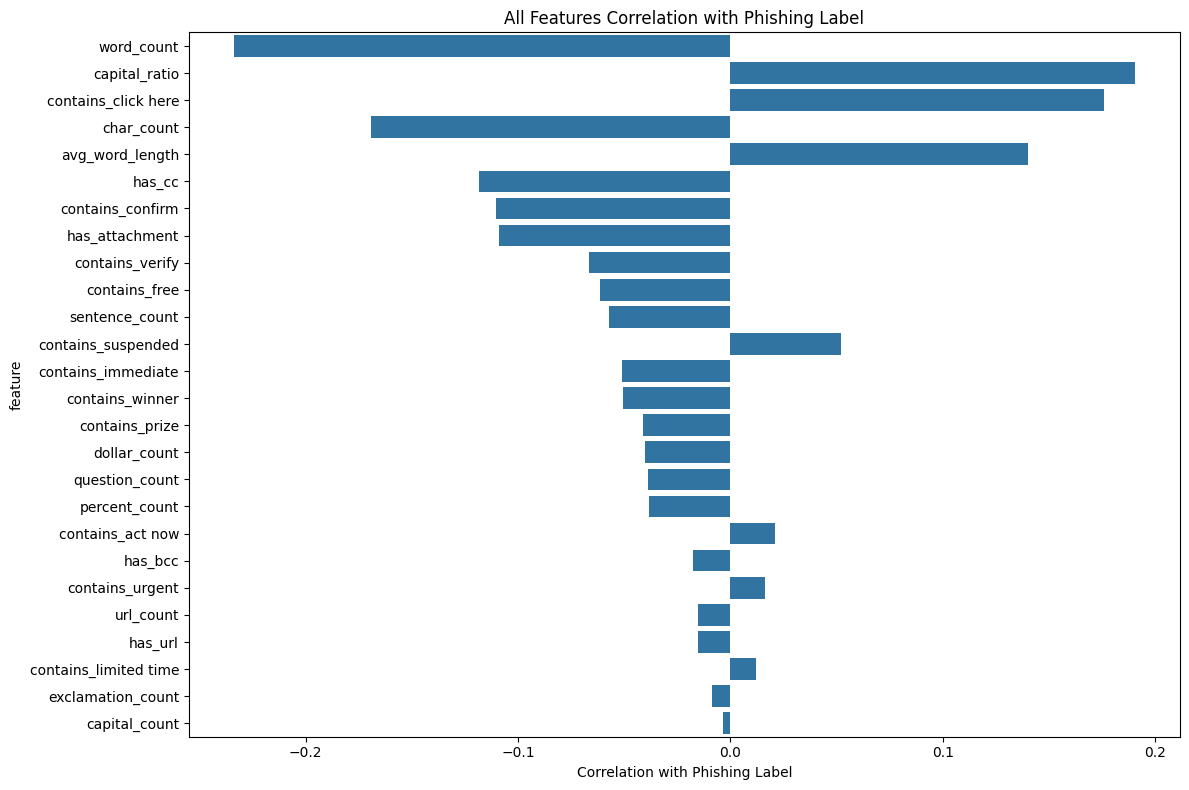

In [43]:
# Visualize feature correlations
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_correlations.head(26), x='correlation', y='feature')
plt.title('All Features Correlation with Phishing Label')
plt.xlabel('Correlation with Phishing Label')
plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------------------------------------------

In [44]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95,
    stop_words='english'
)

In [45]:
# Fit and transform
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (44251, 5000)


In [46]:
# feature names
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)

In [47]:
# Combine TF-IDF features with email features
all_features = pd.concat([email_features.reset_index(drop=True), 
                         tfidf_df.reset_index(drop=True)], axis=1)

In [48]:
print(f"Email-specific features: {email_features.shape[1]}")
print(f"TF-IDF features: {tfidf_df.shape[1]}")

Email-specific features: 26
TF-IDF features: 5000


In [65]:
print(f"Total features: {all_features.shape[1]}")

Total features: 5026


In [50]:
print(f"\nExample TF-IDF features: {list(tfidf_feature_names[:10])}")


Example TF-IDF features: ['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaai', 'aaron', 'aaron kulkis', 'ability', 'able', 'abraham', 'absolute', 'absolutely', 'absolutely guaranteed']


--------------------------------------------------------------------------------------------------------------------

In [51]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# top K features using chi-square test
k_best = 1000
selector = SelectKBest(score_func=chi2, k=k_best)
X_selected = selector.fit_transform(all_features, df['label'])

In [52]:
# selected feature names
selected_feature_mask = selector.get_support()
selected_features = all_features.columns[selected_feature_mask]

In [53]:
print(f"Features selected: {len(selected_features)} out of {all_features.shape[1]}")
print(f"Selected features shape: {X_selected.shape}")

Features selected: 1000 out of 5026
Selected features shape: (44251, 1000)


In [54]:
# Show top features
feature_scores = pd.DataFrame({
    'feature': all_features.columns,
    'score': selector.scores_,
    'selected': selector.get_support()
})

feature_scores = feature_scores.sort_values('score', ascending=False)

In [58]:
print(f"\nTop 15 selected features:")
top_features = feature_scores[feature_scores['selected']].head(700)
for idx, row in top_features.iterrows():
    print(f"{row['feature']}: {row['score']:.2f}")


Top 15 selected features:
char_count: 14580895.60
word_count: 2852693.03
sentence_count: 25904.53
dollar_count: 11247.54
percent_count: 9107.35
avg_word_length: 6083.04
capital_count: 2984.41
contains_click here: 1253.87
question_count: 1037.76
replica: 896.01
watch: 807.58
wrote: 751.34
has_cc: 612.39
cnncom: 576.79
python: 565.24
alert: 563.78
contains_confirm: 529.94
has_attachment: 519.99
file: 506.19
list: 480.71
replica watch: 452.83
cnn: 430.24
pythondev: 407.67
mailing list: 390.40
love: 364.67
cable news: 359.31
news network: 357.24
mailing: 342.75
perl: 337.79
message: 331.53
cable: 326.98
code: 322.13
men: 320.70
custom: 312.12
bug: 311.94
opensuse: 308.72
test: 306.50
health: 300.48
rolex: 298.12
alert custom: 291.99
custom alert: 291.99
news: 283.13
server: 282.09
list unsubscribe: 279.01
version: 274.69
problem: 270.91
group: 268.38
linux: 265.79
replica classic: 259.09
user: 258.82
paper: 256.81
daily: 250.82
life: 249.86
mail: 248.77
date: 244.36
lllp: 243.54
network l

In [59]:
# Count email vs TF-IDF features selected
email_features_selected = sum(1 for feat in selected_features if feat in email_features.columns)
tfidf_features_selected = len(selected_features) - email_features_selected

In [60]:
print(f"\nFeature selection breakdown:")
print(f"Email-specific features selected: {email_features_selected}/{email_features.shape[1]}")
print(f"TF-IDF features selected: {tfidf_features_selected}/{tfidf_df.shape[1]}")


Feature selection breakdown:
Email-specific features selected: 20/26
TF-IDF features selected: 980/5000


--------------------------------------------------------------------------------------------------------------------

In [68]:
X = X_selected
y = df['label'].values

In [69]:
print(f"Final feature matrix shape: {X.shape}")
print(f"Target distribution: {np.bincount(y)}")

Final feature matrix shape: (44251, 1000)
Target distribution: [20766 23485]


In [70]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [71]:
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (35400, 1000)
Test set: (8851, 1000)


In [72]:
print(f"Training labels - Legitimate: {sum(y_train==0)}, Phishing: {sum(y_train==1)}")
print(f"Test labels - Legitimate: {sum(y_test==0)}, Phishing: {sum(y_test==1)}")

Training labels - Legitimate: 16612, Phishing: 18788
Test labels - Legitimate: 4154, Phishing: 4697


In [73]:
# scaling features for LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

--------------------------------------------------------------------------------------------------------------------

In [74]:
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
}

In [75]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train model
    model.fit(X_train, y_train)
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    results = {
        'Model': model_name,
        'Accuracy': accuracy,
        'F1-Score': f1,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }
    
    if y_pred_proba is not None:
        auc = roc_auc_score(y_test, y_pred_proba)
        results['AUC'] = auc
    
    return results, y_pred, y_pred_proba

In [76]:
# all models evaluation
results = []
predictions = {}
print("Evaluating models...")
for name, model in models.items():
    print(f"Training {name}...")
    X_tr, X_te = X_train, X_test
    
    # model-eval
    result, y_pred, y_pred_proba = evaluate_model(model, X_tr, X_te, y_train, y_test, name)
    results.append(result)
    predictions[name] = {'pred': y_pred, 'proba': y_pred_proba}

Evaluating models...
Training Naive Bayes...
Training Logistic Regression...
Training Random Forest...
Training Gradient Boosting...


In [77]:
# results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

In [78]:
print("\nModel Performance Comparison:")
print(results_df.round(4))


Model Performance Comparison:
                 Model  Accuracy  F1-Score  CV Mean  CV Std     AUC
2        Random Forest    0.9866    0.9873   0.9854  0.0011  0.9990
3    Gradient Boosting    0.9672    0.9693   0.9679  0.0020  0.9948
1  Logistic Regression    0.9348    0.9391   0.9326  0.0091  0.9549
0          Naive Bayes    0.7163    0.6698   0.7175  0.0077  0.8678


--------------------------------------------------------------------------------------------------------------------

In [79]:
# Getbest model
best_model_name = results_df.iloc[0]['Model']
best_predictions = predictions[best_model_name]

print(f"Best Model: {best_model_name}")

Best Model: Random Forest


In [80]:
# Detailed classification report
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, best_predictions['pred'], 
                          target_names=['Legitimate', 'Phishing']))


Classification Report for Random Forest:
              precision    recall  f1-score   support

  Legitimate       0.98      0.99      0.99      4154
    Phishing       0.99      0.98      0.99      4697

    accuracy                           0.99      8851
   macro avg       0.99      0.99      0.99      8851
weighted avg       0.99      0.99      0.99      8851



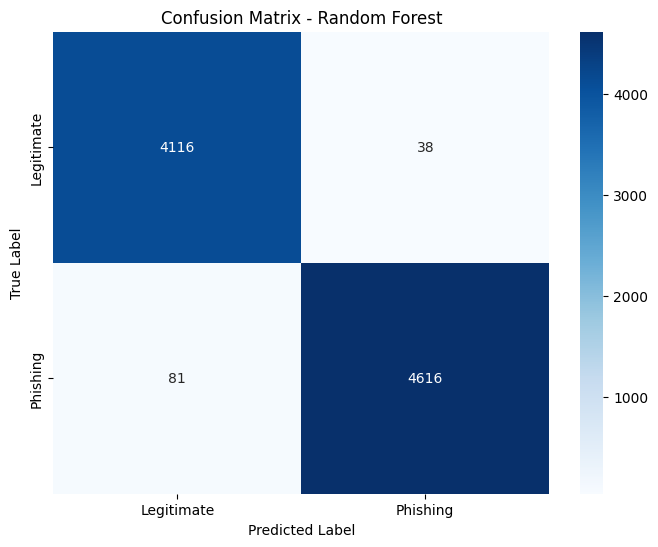

In [81]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions['pred'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate', 'Phishing'],
            yticklabels=['Legitimate', 'Phishing'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

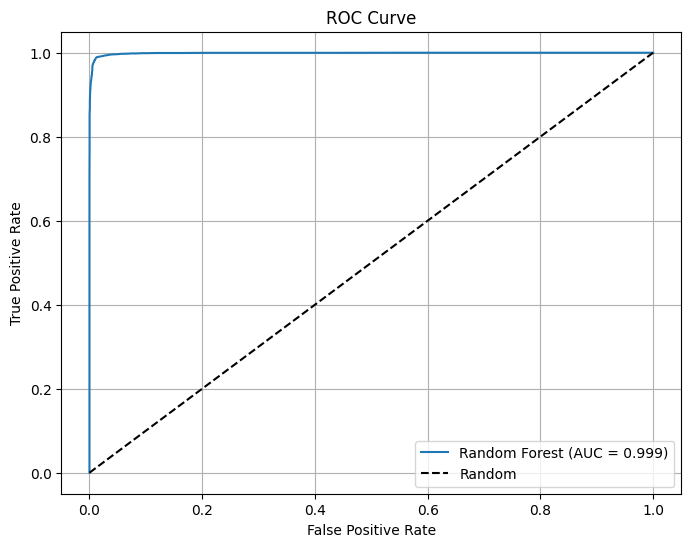

In [82]:
# ROC Curve (if probability predictions available)
if best_predictions['proba'] is not None:
    fpr, tpr, _ = roc_curve(y_test, best_predictions['proba'])
    auc_score = roc_auc_score(y_test, best_predictions['proba'])
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {auc_score:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

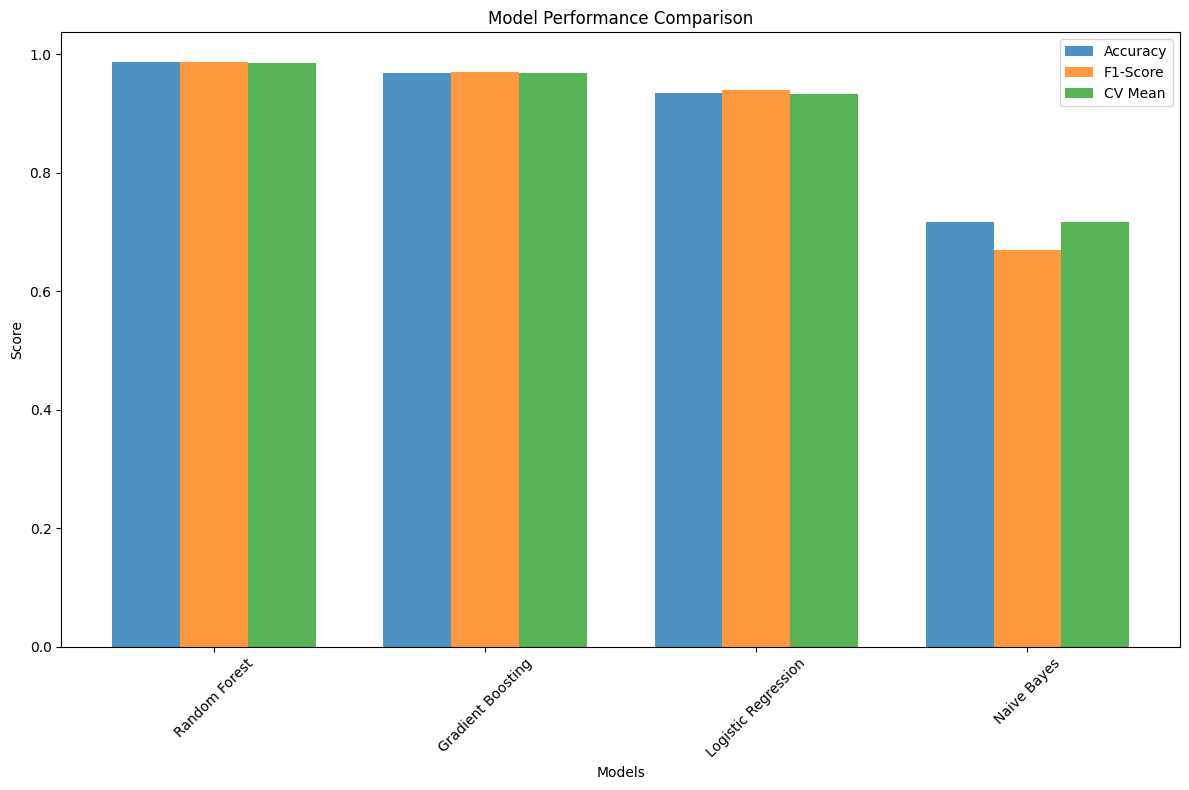

In [83]:
# Model comparison visualization
plt.figure(figsize=(12, 8))
metrics_to_plot = ['Accuracy', 'F1-Score', 'CV Mean']
x = np.arange(len(results_df))
width = 0.25

for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*width, results_df[metric], width, label=metric, alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x + width, results_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------------------------------------------


Top 20 Most Important Features (Random Forest):
                feature  importance
2        sentence_count    0.077130
992               wrote    0.057503
8         capital_count    0.056830
0            char_count    0.053909
1            word_count    0.052128
476                list    0.020893
4     exclamation_count    0.019756
5        question_count    0.019080
529             message    0.018418
3       avg_word_length    0.016109
499             mailing    0.015461
500        mailing list    0.015308
297                file    0.014676
682             problem    0.013787
212                date    0.013179
9         capital_ratio    0.012645
470                like    0.011415
881              thanks    0.009214
604            opensuse    0.009062
674  preference setting    0.008220


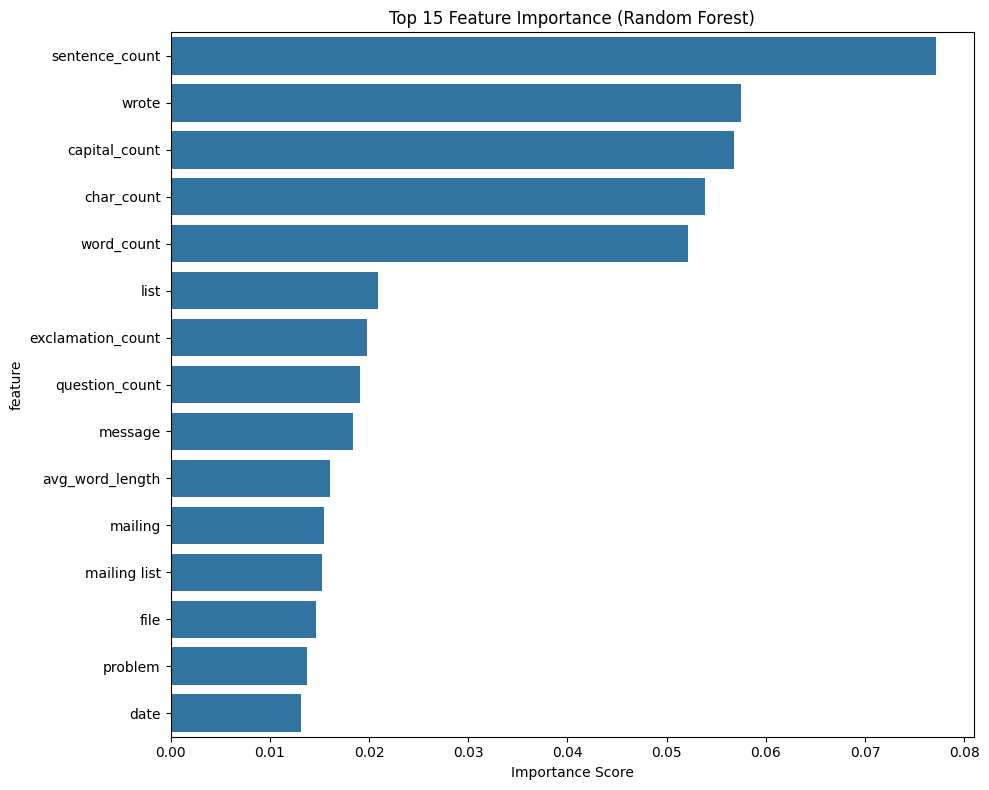

In [84]:
rf_model = models['Random Forest']
rf_model.fit(X_train, y_train)

if hasattr(rf_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 20 Most Important Features (Random Forest):")
    print(feature_importance.head(20))
    
    # plot
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title('Top 15 Feature Importance (Random Forest)')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

--------------------------------------------------------------------------------------------------------------------

In [85]:
print(f"Dataset Summary:")
print(f"- Total emails processed: {len(df):,}")
print(f"- Phishing emails: {sum(df['label']):,} ({sum(df['label'])/len(df)*100:.1f}%)")
print(f"- Legitimate emails: {len(df)-sum(df['label']):,} ({(len(df)-sum(df['label']))/len(df)*100:.1f}%)")

print(f"\nBest Performing Model: {best_model_name}")
print(f"- Test Accuracy: {results_df.iloc[0]['Accuracy']:.4f}")
print(f"- F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"- Cross-Validation Score: {results_df.iloc[0]['CV Mean']:.4f} ± {results_df.iloc[0]['CV Std']:.4f}")
print("\n=== PIPELINE COMPLETED SUCCESSFULLY ===")

Dataset Summary:
- Total emails processed: 44,251
- Phishing emails: 23,485 (53.1%)
- Legitimate emails: 20,766 (46.9%)

Best Performing Model: Random Forest
- Test Accuracy: 0.9866
- F1-Score: 0.9873
- Cross-Validation Score: 0.9854 ± 0.0011

=== PIPELINE COMPLETED SUCCESSFULLY ===


--------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------